In [ ]:
!rm -rf /content/sample_data

In [ ]:
!git clone https://github.com/jeya-maria-jose/Medical-Transformer

Cloning into 'Medical-Transformer'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 129 (delta 49), reused 82 (delta 17), pack-reused 0
Receiving objects: 100% (129/129), 225.91 KiB | 11.29 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [ ]:
!gdown --id 1JZN9Jq9km0rZNiYNEukE_8f0CsSK3Pe4

Downloading...
From: https://drive.google.com/uc?id=1JZN9Jq9km0rZNiYNEukE_8f0CsSK3Pe4
To: /content/MoNuSegTrainingData.zip
84.1MB [00:01, 61.6MB/s]


In [ ]:
!7z x MoNuSegTrainingData.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 84126760 bytes (81 MiB)

Extracting archive: MoNuSegTrainingData.zip
--
Path = MoNuSegTrainingData.zip
Type = zip
Physical Size = 84126760

  0%     18% 12 - MoNuSegTrainingData/Annotations/TCGA-AY-A8YK-01A-01-TS1.xml                                                                      34% 22 - MoNuSegTrainingData/Annotations/TCGA-G9-6348-01Z-00-DX1.xml                                                                      49% 27 - MoNuSeg

In [ ]:
!gdown --id 1NKkSQ5T0ZNQ8aUhh0a8Dt2YKYCQXIViw

Downloading...
From: https://drive.google.com/uc?id=1NKkSQ5T0ZNQ8aUhh0a8Dt2YKYCQXIViw
To: /content/MoNuSegTestData.zip
41.6MB [00:00, 99.1MB/s]


In [ ]:
!7z x MoNuSegTestData.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 41620178 bytes (40 MiB)

Extracting archive: MoNuSegTestData.zip
--
Path = MoNuSegTestData.zip
Type = zip
Physical Size = 41620178

  0%     42% 11 - MoNuSegTestData/TCGA-AO-A0J2-01A-01-BSA.tif                                                      83% 23 - MoNuSegTestData/TCGA-HT-8564-01Z-00-DX1.tif                                                     Everything is Ok

Folders: 1
Files: 28
Size:       60571259
Compressed: 41620178


In [ ]:
from xml.dom import minidom

# parse an xml file by name
mydoc = minidom.parse('/content/MoNuSegTrainingData/Annotations/TCGA-38-6178-01Z-00-DX1.xml')

Regions = mydoc.getElementsByTagName('Region')

In [ ]:
import numpy as np
xy=[]
for index,region in enumerate(Regions):
  vertices=region.getElementsByTagName('Vertex')
  xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])
    

Text(0.5, 1.0, 'Original image')

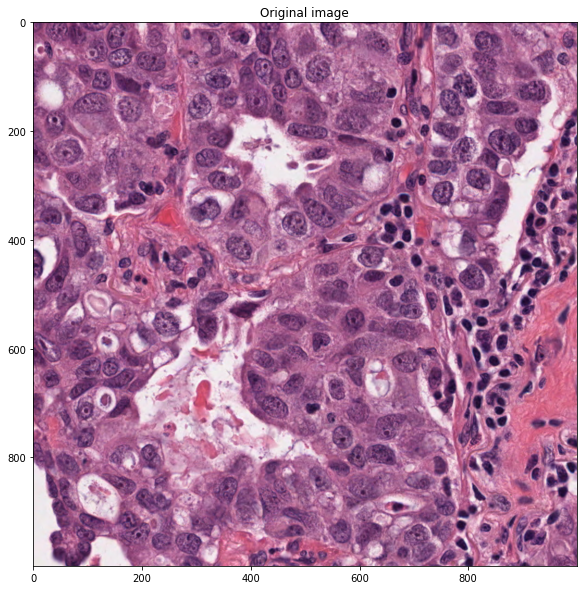

In [ ]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
img=np.array(Image.open('/content/MoNuSegTrainingData/Tissue Images/TCGA-38-6178-01Z-00-DX1.tif'))
img.shape
#img=img.resize(256,256)
# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [ ]:
img = Image.new('L', (1000, 1000), 0)
for i in xy:
  ImageDraw.Draw(img).polygon(i, outline=1, fill=1)

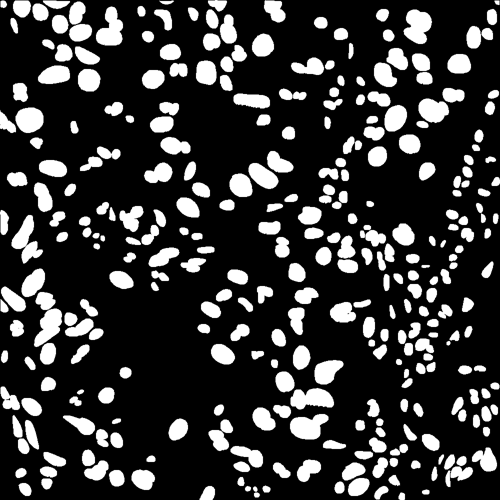

In [ ]:
Image.fromarray(255*np.array(img)).resize((500,500))#.save('mask.png')

In [ ]:
import os
for root,dir,files in os.walk('/content/MoNuSegTrainingData'):
  print(root)
  print(dir)
  print(files)
  print('**************************************************')

/content/MoNuSegTrainingData
['Tissue Images', 'Annotations']
[]
**************************************************
/content/MoNuSegTrainingData/Tissue Images
[]
['TCGA-G9-6362-01Z-00-DX1.tif', 'TCGA-DK-A2I6-01A-01-TS1.tif', 'TCGA-HE-7130-01Z-00-DX1.tif', 'TCGA-AR-A1AK-01Z-00-DX1.tif', 'TCGA-A7-A13E-01Z-00-DX1.tif', 'TCGA-E2-A1B5-01Z-00-DX1.tif', 'TCGA-G9-6363-01Z-00-DX1.tif', 'TCGA-G9-6348-01Z-00-DX1.tif', 'TCGA-NH-A8F7-01A-01-TS1.tif', 'TCGA-49-4488-01Z-00-DX1.tif', 'TCGA-21-5786-01Z-00-DX1.tif', 'TCGA-18-5592-01Z-00-DX1.tif', 'TCGA-B0-5711-01Z-00-DX1.tif', 'TCGA-HE-7128-01Z-00-DX1.tif', 'TCGA-38-6178-01Z-00-DX1.tif', 'TCGA-B0-5710-01Z-00-DX1.tif', 'TCGA-B0-5698-01Z-00-DX1.tif', 'TCGA-21-5784-01Z-00-DX1.tif', 'TCGA-G9-6356-01Z-00-DX1.tif', 'TCGA-50-5931-01Z-00-DX1.tif', 'TCGA-A7-A13F-01Z-00-DX1.tif', 'TCGA-G2-A2EK-01A-02-TSB.tif', 'TCGA-E2-A14V-01Z-00-DX1.tif', 'TCGA-AY-A8YK-01A-01-TS1.tif', 'TCGA-HE-7129-01Z-00-DX1.tif', 'TCGA-RD-A8N9-01A-01-TS1.tif', 'TCGA-AR-A1AS-01Z-00-DX1.tif', 

In [ ]:
from shutil import copyfile
import matplotlib.pyplot as plt
%matplotlib inline

def get_polygons(x):
  mydoc = minidom.parse(x)
  Regions = mydoc.getElementsByTagName('Region')
  xy=[]
  for index,region in enumerate(Regions):
    vertices=region.getElementsByTagName('Vertex')
    xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])
  return xy

def get_masks(x):
  xy=get_polygons(x)
  img = Image.new('L', (1000, 1000), 0)
  for i in xy:
    ImageDraw.Draw(img).polygon(i, outline=1, fill=1)
  return Image.fromarray(255*np.array(img))



def save_datapoint(x,folder,name):
  label=get_masks('/content/MoNuSegTrainingData/Annotations/'+x)
  image=Image.open('/content/MoNuSegTrainingData/Tissue Images/'+x.replace('xml','tif'))
  image=image.resize((256,256))
  label=label.resize((256,256))
  
  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

In [ ]:
!rm -rf test\ folder
!rm -rf train\ folder\ folder
!rm -rf validation\ folder

In [ ]:
import random
import itertools

for i,j in itertools.product(['/content/train folder/',
                              '/content/validation folder/',
                              '/content/test folder/'],
                             ['img',
                              'labelcol']):
  os.makedirs(i+j,exist_ok=True)
random.random()



v,t = 0,0
_, _, filenames = next(os.walk('/content/MoNuSegTrainingData/Annotations'))
for i in filenames:
  if random.random()<=0.167:
    v+=1
    save_datapoint(i,'/content/validation folder',str(v))
  else:
    t+=1
    save_datapoint(i,'/content/train folder',str(t))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
train_DIR='/content/train folder'
validation_DIR='/content/validation folder'
test_DIR='/content/test folder'
train_res_DIR='/content/train results'
test_rese_DIR='/content/test_results'
command="python Medical-Transformer/train.py \
 --train_dataset \"{}\" \
 --val_dataset \"{}\" \
 --direc '{}' \
 --batch_size 4 \
 --epoch 10 \
 --save_freq 10 \
 --modelname \"MedT\" \
 --learning_rate 0.001 \
 --imgsize 128 \
 --gray \"no\" \
".format(train_DIR,validation_DIR,train_res_DIR)

!{command}

In [ ]:
def save_datapoint(x,folder,name):
  label=get_masks('/content/MoNuSegTestData/'+x)
  image=Image.open('/content/MoNuSegTestData/'+x.replace('xml','tif'))
  image=image.resize((128,128))
  label=label.resize((128,128))
  
  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

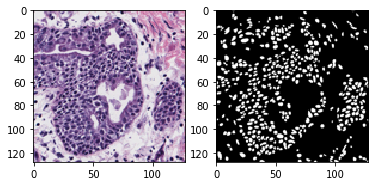

(128, 128, 3)   (128, 128)


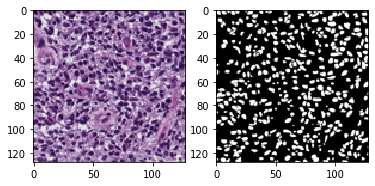

(128, 128, 3)   (128, 128)


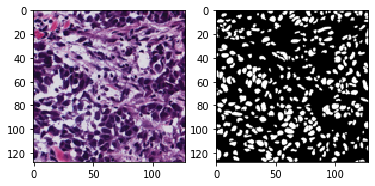

(128, 128, 3)   (128, 128)


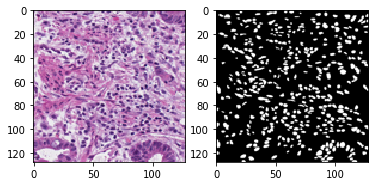

(128, 128, 3)   (128, 128)


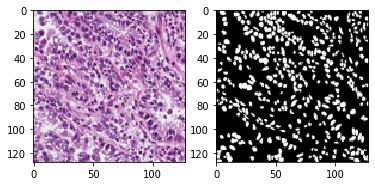

(128, 128, 3)   (128, 128)


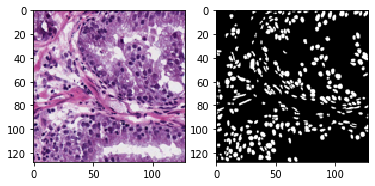

(128, 128, 3)   (128, 128)


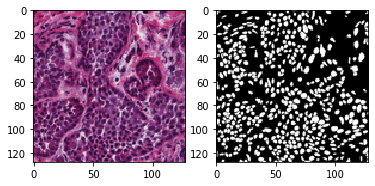

(128, 128, 3)   (128, 128)


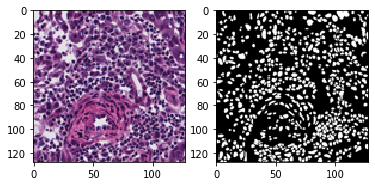

(128, 128, 3)   (128, 128)


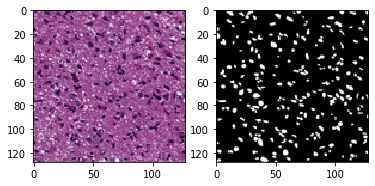

(128, 128, 3)   (128, 128)


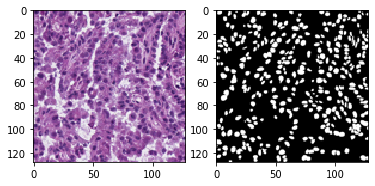

(128, 128, 3)   (128, 128)


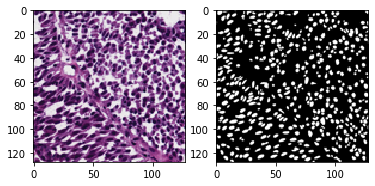

(128, 128, 3)   (128, 128)


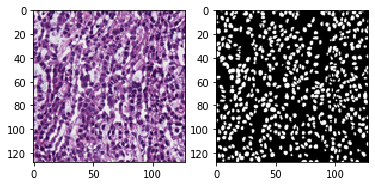

(128, 128, 3)   (128, 128)


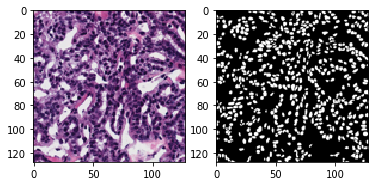

(128, 128, 3)   (128, 128)


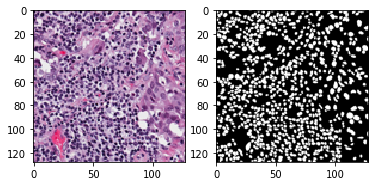

(128, 128, 3)   (128, 128)


In [ ]:
c=0
for i in os.listdir('/content/MoNuSegTestData/'):
  if i.endswith('xml'):
    c+=1
    save_datapoint(i,'/content/test folder',str(c))

In [ ]:
command2="python Medical-Transformer/test.py \
--loaddirec \"{}\" \
--val_dataset \"{}\" \
--train_dataset \"{}\" \
--direc '{}' \
--batch_size 1 \
--modelname \"MedT\" \
--imgsize 128 \
--gray \"no\"".format('/content/train results/0/MedT.pth',test_DIR,test_DIR, test_rese_DIR)
!{command2}

Traceback (most recent call last):
  File "Medical-Transformer/test.py", line 62, in <module>
    aug = args.aug
AttributeError: 'Namespace' object has no attribute 'aug'


In [ ]:
N=328

st=0

Fsc=[]

MIU=[]

PA=[]

bestfsc=0

bestmiu=0
bestpa=0
bestep=0

folder='/content/test folder/labelcol'
listinfo=os.listdir(folder)
listinfo

['0012.png',
 '0007.png',
 '0014.png',
 '0003.png',
 '0011.png',
 '0002.png',
 '0008.png',
 '0004.png',
 '0001.png',
 '0013.png',
 '0006.png',
 '0010.png',
 '0005.png',
 '0009.png']

In [ ]:
from sklearn.metrics import jaccard_similarity_score,f1_score
f1,iou=[],[]
for i in listinfo:
        I = np.array(Image.open('/content/test folder/labelcol/'+i))
        I=np.where(I>=127,1,0)

        
        L = np.array(Image.open('/content/test_results/'+i))
        L=np.where(L>=127,1,0)
        y_true,y_pred = I.flatten(),L.flatten()
        f1.append(f1_score(y_true,y_pred))
        iou.append(jaccard_similarity_score(y_true,y_pred))

In [ ]:
np.mean(f1),np.mean(iou)

In [ ]:

count=0
fig, ax = plt.subplots(7,4,figsize=(30,60))

[axi.set_axis_off() for axi in ax.ravel()]
for index,k in enumerate(os.listdir('test_results')):
  
  i='test folder/img/'+k
  j='test_results/'+k
  img=Image.open(i)
  label=Image.open(j)
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(img)
  count+=1
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(label,cmap='gray')
  count+=1
plt.savefig('test_results.png')

In [ ]:
!easy_install smop --user

In [ ]:
!smop /content/Medical-Transformer/performancemetrics_monuseg.m --output perf.py